### 워드클라우드 - 어버이날 선물

In [1]:
import re, nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [2]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [3]:
okt = Okt()
tokens = okt.nouns(text)        # 문장에서 명사 추출
tokens[:10]

['부모님', '어깨', '무릎', '저희', '부모님', '사용', '매번', '칭찬', '제품', '답글']

In [4]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:            # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 문장을 만족할 때 까지 반복

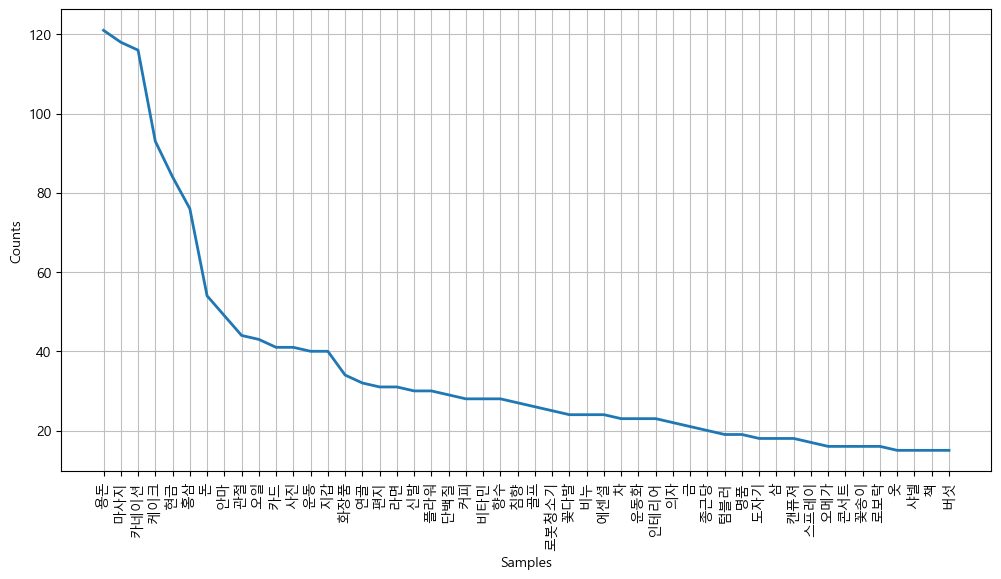

In [75]:
gift = nltk.Text(new_tokens, name='어버이날선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [74]:
stoptext = """
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 도움 요 참고 스 사용 활동
    때 파트너 고민 수수료 위 구매 등 세트 생각 제공 거 요즘 기 분 상품 박스 꽃 정액 한번
    마음 이미지 존재 링크 일환 아래 정말 더 선택 향 기능 부담 지금 쿠팡 하나 관리 가지 양제
    포스팅 답변 가장 방향 주문 준비 인기 브랜드 날 디자인 정보 건 저희 의미 채택 이번
    콘드 이친 배송 질문 아버지 일 시간 나이 어머니 꼭 엄마 정도 걸 때문 제작 좀 자 발 사 보시 직접
    도 석고 노블 호랑이 후기 제일 번 포장 할인 평소 아빠 관련 다른 효과 집 전 중 보충 바로 통해
    드릴 해 조금 최고 우리 고려 글 피 안 종류 성분 아버님 구성 경우 생신 용품 봉투 그 용 판매 매일
    작년 검색 더욱 어머님 구 조절 여러 프리미엄 섭취 가성 가요 달 단 기념 다음 통증 이벤트 몸
    사람 그냥 당뇨 무엇 여기 확인 실용 어르신 카페 나 사실 개 천연 정성 혹시 힐링 감동 올해
    뭘 등등 따라서 증상 소개 비 행사 무릎 취향 어른 효능 데 기운 이용 고급 코로나 뭐 살균 곧 부분
    골드 시기 미리 피톤 스틱 추억 진짜 편 눈 또 필요 곳 쇼핑 인체 사랑 광고 목 공유 피부 순위 바디
    치드 탈취 일반 연세 줄 노화 게 기도 산양 하루 가족 면역 가정 센스 규어 추가 임인년 사용자 백수
    취미 결정 기념일 컬러 순환 패키지 자주 두 보 작성 개인 탄생석 예방 내 포 혈액 얼마 모든 다리 어버이
    구경 정 앞 및 어깨 말씀 느낌 손 또한 전체 완화 아주 학생 감사패 휴대 장모님 강력 국내 순 자체 클릭
    감사 청소 디 진동 당일
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['매번', '칭찬', '답글', '원적외선', '치료', '적외선', '사기', '처럼', '빛', '안나']

In [76]:
data = gift.vocab().most_common(5)
data

[('용돈', 121), ('마사지', 118), ('카네이션', 116), ('케이크', 93), ('현금', 84)]

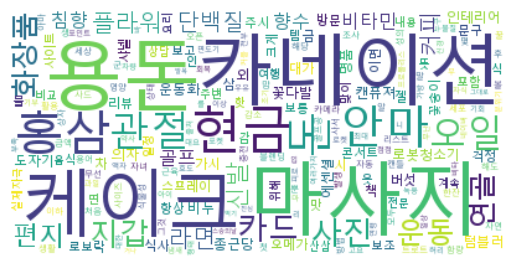

In [77]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

In [78]:
import numpy as np
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

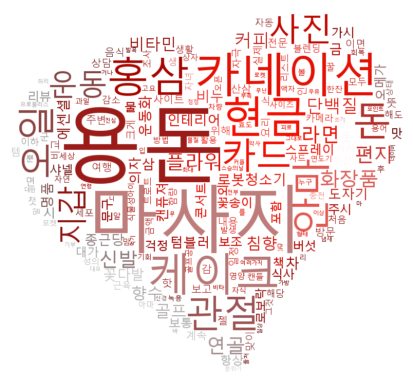

In [79]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');